<a href="https://colab.research.google.com/github/GiuniorCandido/PTC-3569_Intro_ML/blob/master/perceptron_rosenblatt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOLUÇÃO FELIPE MACHADO ESTUDANTE POLIUSP MECATRONICA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Questão 1)

v = np.array([10,-20,4,-2])         # Saída dos neurônios / entrada do neurônio 'j'
w = np.array([0.8, 0.2, -1, -0.9])  # Pesos do neurônio 'j'
vies = 0                            # Viés do neurônio

# Item b1)
y_j = np.sum(w*v) + vies            # Linear
print(f"Considerando um modelo linear, a saída do neurônio é: {y_j}")

# Item b2) 
y_j = (np.sum(w*v) > vies).astype(int)     
print(f"Considerando um modelo de McCulloch-Pitts, a saída do neurônio é: {y_j}")

Considerando um modelo linear, a saída do neurônio é: 1.8
Considerando um modelo de McCulloch-Pitts, a saída do neurônio é: 1


In [5]:
# Questão 2
v_j = np.sum(w*v) + vies            # Calculando o potencial do neurônio
y_j = 1/(1 + np.exp(-v_j))          # Função Sigmoide
print(f"Considerando um modelo sigmoide, a saída do neurônio é: {y_j}")

Considerando um modelo sigmoide, a saída do neurônio é: 0.8581489350995123


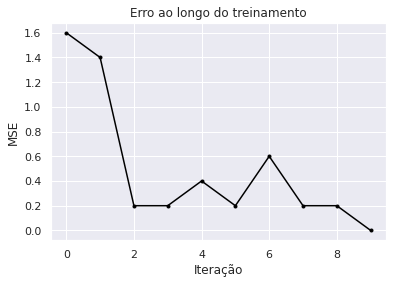

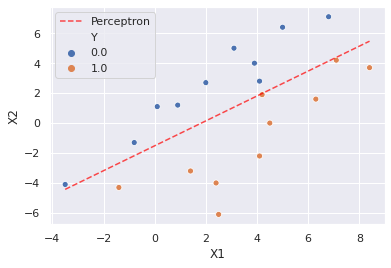

Silhouette Score : 0.14


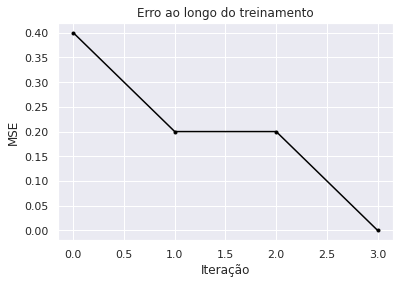

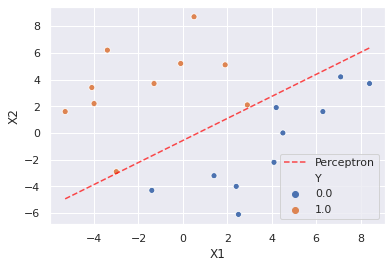

Silhouette Score : 0.35


In [11]:
# Questão 3
w1 = np.array([[ 0.1, 1.1],
               [ 6.8, 7.1],
               [-3.5,-4.1],
               [ 2.0, 2.7],
               [ 4.1, 2.8],
               [ 3.1, 5.0],
               [-0.8,-1.3],
               [ 0.9, 1.2],
               [ 5.0, 6.4],
               [ 3.9, 4.0]])

w2 = np.array([[ 7.1, 4.2],
               [-1.4,-4.3],
               [ 4.5, 0.0],
               [ 6.3, 1.6],
               [ 4.2, 1.9],
               [ 1.4,-3.2],
               [ 2.4,-4.0],
               [ 2.5,-6.1],
               [ 8.4, 3.7],
               [ 4.1,-2.2]])

w3 = np.array([[-3.0,-2.9],
               [ 0.5, 8.7],
               [ 2.9, 2.1],
               [-0.1, 5.2],
               [-4.0, 2.2],
               [-1.3, 3.7],
               [-3.4, 6.2],
               [-4.1, 3.4],
               [-5.3, 1.6],
               [ 1.9, 5.1]])

class Perceptron:
    def __init__(self, shape, alpha=0.2):
        """
        Cria o objeto perceptron. Aqui estamos considerando treino por batch. 
        Função de ativação: se a tensão do neurônio for positiva, ele retorna 1; 
        caso contrário, retorna 0.

        Parameters
        ----------
        shape : int
            Dimensão dos dados de entrada.
        alpha : float (default=0.2)
            Taxa de aprendizagem.
        """
        self.w = np.array([1] + [0]*shape)
        self.alpha = alpha
        self.error = []

    def fit(self, X, y, tol=1e-4, max_iter=1000):
        """
        Método que atualiza os pesos.

        Parameters
        ----------
        X : numpy.array
            Dados de entrada.
        y : numpy.array
            Dados de saída.
        tol : float (default=1e-4)
            Tolerância mínima para aceitar convergência.
        max_iter : int (default=1000)
            Número de iterações máxima.
        """
        X_i = np.insert(X, 0, 1, 1)             # Adiciona coluna igual a 1 p/ viés
        for repeat in range(max_iter):
            for i in range(X_i.shape[0]):
                sample = X_i[i,:]
                v = np.sum(self.w*sample)           # Calcula a tensão no ponto
                y_model = (v > 0).astype(int)*2 - 1 # Calcula a saída no ponto

                e = y_model - y[i]                  # Calcula o erro 

                grad = e*sample                     # Calcula o gradiente
                self.w = self.w - self.alpha*grad   # Atualiza os pesos

            v_all = np.sum(self.w*X_i, axis=1)
            y_all = (v_all > 0).astype(int)*2 - 1 
            error = np.mean( (y-y_all)**2 )

            self.error.append(error)

            if error < tol:
                break

        self.data = np.concatenate([X, y.reshape(-1,1)], axis=1)
        pass

    def plotError(self):
            plt.plot(np.arange(len(self.error)), self.error, marker='.', c='black')
            plt.xlabel("Iteração")
            plt.ylabel("MSE")
            plt.title("Erro ao longo do treinamento")
            plt.show()

    def plotCurve(self):
          df = pd.DataFrame(self.data, columns=["X1","X2","Y"])
          df.replace(-1,0, inplace=True)
          sns.scatterplot(x='X1', y='X2', hue='Y', data=df)

          x1 = [self.data[:,0].min(), self.data[:,0].max()]
          x2 = [(-self.w[0] - self.w[1]*x1[0])/self.w[2], (-self.w[0] - self.w[1]*x1[1])/self.w[2]]
          plt.plot(x1, x2, color='red', label='Perceptron', linestyle='--', alpha=0.7)
          plt.legend()
          plt.show()

from sklearn.metrics import silhouette_score

# Item a)

X = np.concatenate([w1, w2])                        # Criando conjunto de treino
y = np.concatenate([np.ones(10)*(-1), np.ones(10)]) # Considerando w1 classe -1 e w2 classe 1

model = Perceptron(2,0.2)
model.fit(X, y)
model.plotError()
model.plotCurve()

print(f"Silhouette Score : {round(silhouette_score(X, y),2)}")

# Item b)

X = np.concatenate([w2, w3])                        # Criando conjunto de treino
y = np.concatenate([np.ones(10)*(-1), np.ones(10)])     # Considerando w1 classe 0 e w2 classe 1

model = Perceptron(2,0.2)
model.fit(X, y)
model.plotError()
model.plotCurve()

print(f"Silhouette Score : {round(silhouette_score(X, y),2)}")